### Loading the super-tensor and creating the temporal networks

To load the super tensor and compute the netowork measures on the data the class __temporal_network__ is used.

In [1]:
import numpy                 as     np
import matplotlib.pyplot     as     plt
from   GDa.temporal_network  import temporal_network

To instantiate the __temporal_network__ we have to supply the monkey name, the session, and date to its constructor.

In [2]:
# Instantiating a temporal network object
net =  temporal_network(monkey='lucy', date=150128, session=1)

When instantiated the temporal network object will load the recording info for the monkey, date, and sesion specified as well as the super tensor;

The super-tensor has dimensions [Number of pairs, Number of frequency bands, Number of trials, Time]. So far we are using the following bands:

- $\theta$  = [4,8[    Hz;
- $\alpha$  = [8,15[   Hz;
- $\beta$   = [15,30[  Hz;
- $\gamma$  = [30,60[  Hz;

Next, we can plot the supertensor (for better visualization bellow we plot only for one trial):

Text(0.5, 0, 'Time (s)')

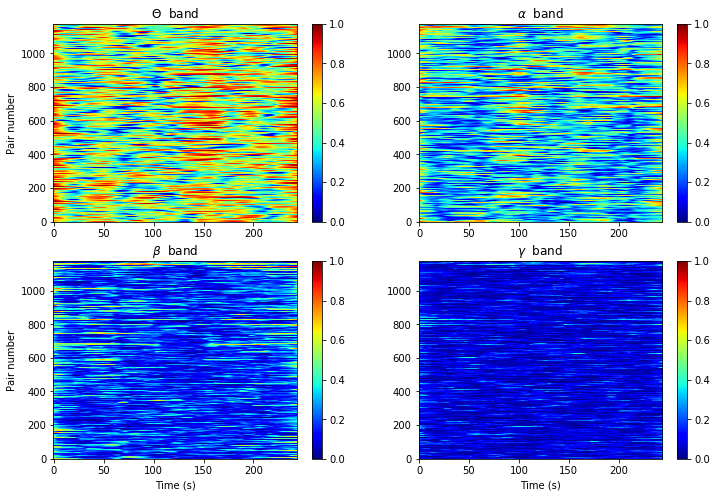

In [3]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
plt.imshow(net.super_tensor[:,0,0,:], aspect='auto', cmap='jet', origin='lower', vmin=0, vmax=1); plt.colorbar()
plt.title(r'$\Theta$  band')
plt.ylabel('Pair number')
plt.subplot(2,2,2)
plt.imshow(net.super_tensor[:,0,1,:], aspect='auto', cmap='jet', origin='lower', vmin=0, vmax=1); plt.colorbar()
plt.title(r'$\alpha$  band')
plt.subplot(2,2,3)
plt.imshow(net.super_tensor[:,0,2,:], aspect='auto', cmap='jet', origin='lower', vmin=0, vmax=1); plt.colorbar()
plt.title(r'$\beta$  band')
plt.ylabel('Pair number')
plt.xlabel('Time (s)')
plt.subplot(2,2,4)
plt.imshow(net.super_tensor[:,0,3,:], aspect='auto', cmap='jet', origin='lower', vmin=0, vmax=1); plt.colorbar()
plt.title(r'$\gamma$  band')
plt.xlabel('Time (s)')

The super tensor can be converted to a adjacency tensor by using the method __convert_to_adjacency__:

In [4]:
net.convert_to_adjacency()

The adjacency tensor has dimensions $[nC, nC,Trials,bands,time]$, where $nC$ is the number of channels, and bands the number of frequency bands.

In [9]:
print('Adjacency tensor shape = ' + str( net.A.shape) )

Adjacency tensor shape = (49, 49, 540, 4, 244)


Let's plot one layer of the adjacency tensor below:

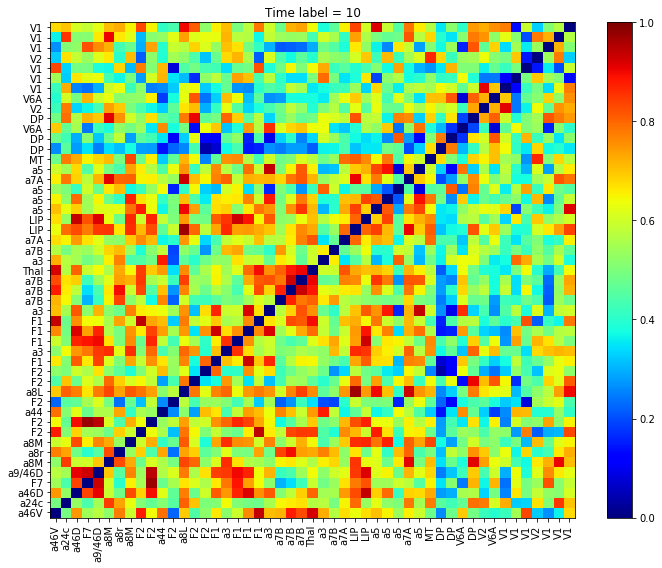

In [16]:
plt.figure(figsize=(10,8))
plt.imshow(net.A[:,:,0,0,10]+net.A[:,:,0,0,10].T,aspect='auto',cmap='jet',origin='lower', vmin=0, vmax=1);plt.colorbar()
plt.title('Time label = ' + str(10))
plt.xticks(range(49), net.session_info['areas'], rotation = 90)
plt.yticks(range(49), net.session_info['areas'])
plt.tight_layout()

In [18]:
net.A.shape

(49, 49, 540, 4, 244)

In [30]:
st = net.A.sum(axis=1)

In [31]:
st.shape

(49, 540, 4, 244)

In [33]:
st = np.swapaxes(st,1,2)
st = st.reshape((49,4,540*244))

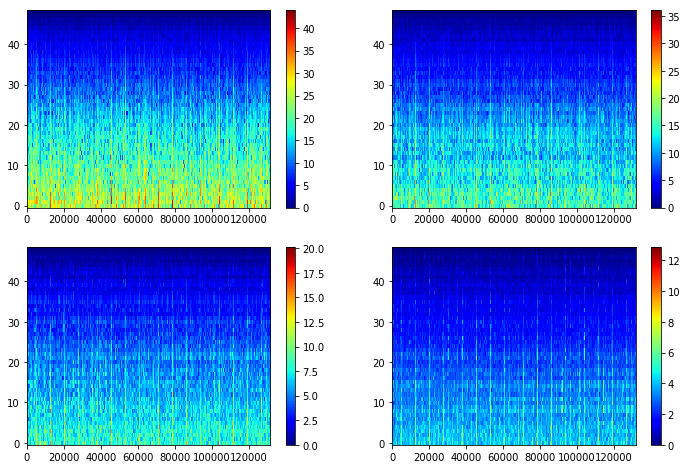

In [27]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
plt.imshow(st[:,0,:], aspect = 'auto', cmap = 'jet', origin = 'lower'); plt.colorbar()
plt.subplot(2,2,2)
plt.imshow(st[:,1,:], aspect = 'auto', cmap = 'jet', origin = 'lower'); plt.colorbar()
plt.subplot(2,2,3)
plt.imshow(st[:,2,:], aspect = 'auto', cmap = 'jet', origin = 'lower'); plt.colorbar()
plt.subplot(2,2,4)
plt.imshow(st[:,3,:], aspect = 'auto', cmap = 'jet', origin = 'lower'); plt.colorbar()

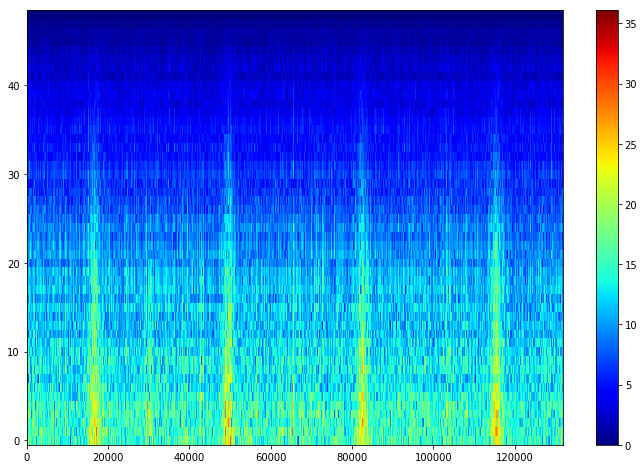

In [35]:
plt.figure(figsize=(12,8))
plt.imshow(st[:,1,:], aspect = 'auto', cmap = 'jet', origin = 'lower'); plt.colorbar()

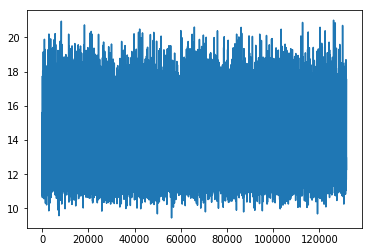

In [38]:
plt.plot(st[:,0,:].mean(axis=0))